# MENGIDENTIFIKASI PERILAKU PELANGGAN TERHADAP PENGGUNAAN JASA PAKET DATA TELKOMSEL

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Data untuk use case.csv')
df

,CustomerID,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Keterangan:

Customer ID: Pelanggan

Gender: Jenis Kelamin Pelanggan

Age: Umur Pelanggan

Telco Spending (IDR 000): Biaya Paket Data Pelanggan Sekali Pembelian (Satuan Ribu)

Purchasing Power: Jumlah Pembelian Paket Data oleh Pelanggan

# Menghitung Nilai Null

In [ ]:
df.isnull().sum()

CustomerID                  0
Gender                      0
Age                         0
Telco Spending (IDR 000)    0
Purchasing power (1-100)    0
dtype: int64

# Mencari Data Pencilan

In [ ]:
def get_lower_upper_bound(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return lower_bound, upper_bound

In [ ]:
def get_outlier_iqr(x):
    lower_bound, upper_bound = get_lower_upper_bound(x)
    return x[np.where((x > upper_bound) | (x < lower_bound))]

In [ ]:
print(get_outlier_iqr(df['Age'].values))
print(get_outlier_iqr(df['Telco Spending (IDR 000)'].values))
print(get_outlier_iqr(df['Purchasing power (1-100)'].values))


[]
[137 137]
[]


In [ ]:
df.describe()

,CustomerID,Age,Telco Spending (IDR 000),Purchasing power (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.sort_values(by=['Telco Spending (IDR 000)', 'Age', 'Purchasing power (1-100)'], ascending = [False,False,False])

,CustomerID,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83
196,197,Female,45,126,28
197,198,Male,32,126,74
194,195,Female,47,120,16
...,...,...,...,...,...
5,6,Female,22,17,76
3,4,Female,23,16,77
2,3,Female,20,16,6
1,2,Male,21,15,81


In [ ]:
import seaborn as sns

<AxesSubplot:xlabel='Telco Spending (IDR 000)'>

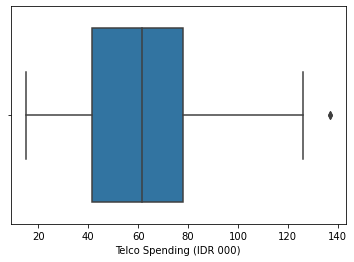

In [ ]:
sns.boxplot(x='Telco Spending (IDR 000)', data=df)

In [ ]:
df.sort_values(by=['CustomerID'], ascending = [False])

,CustomerID,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
199,200,Male,30,137,83
198,199,Male,32,137,18
197,198,Male,32,126,74
196,197,Female,45,126,28
195,196,Female,35,120,79
...,...,...,...,...,...
4,5,Female,31,17,40
3,4,Female,23,16,77
2,3,Female,20,16,6
1,2,Male,21,15,81


# Menghilangkan Data Pencilan

In [ ]:
def remove_outlier_IQR(x):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_final= df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR)))]
    return df_final

In [ ]:
df_new = remove_outlier_IQR(df)

C:\Users\USER\AppData\Local\Temp\ipykernel_2240\3007848947.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final= df[~((df<(Q1 - 1.5*IQR)) | (df>(Q3 + 1.5*IQR)))]


In [ ]:
df_new

,CustomerID,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40
...,...,...,...,...,...
195,196,Female,35,120.0,79
196,197,Female,45,126.0,28
197,198,Male,32,126.0,74
198,199,Male,32,NaN,18


In [ ]:
df_new.fillna(method ='ffill', inplace=True)

In [ ]:
df_new

,CustomerID,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100)
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40
...,...,...,...,...,...
195,196,Female,35,120.0,79
196,197,Female,45,126.0,28
197,198,Male,32,126.0,74
198,199,Male,32,126.0,18


<AxesSubplot:xlabel='Telco Spending (IDR 000)'>

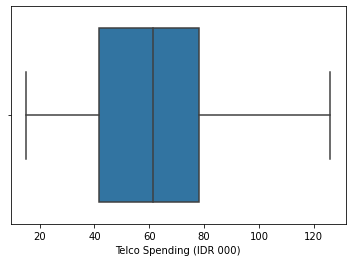

In [ ]:
sns.boxplot(x='Telco Spending (IDR 000)', data=df_new)

In [ ]:
print(get_outlier_iqr(df_new['Age'].values))
print(get_outlier_iqr(df_new['Telco Spending (IDR 000)'].values))
print(get_outlier_iqr(df_new['Purchasing power (1-100)'].values))

[]
[]
[]


In [ ]:
def modify_nilai(telco, purchase):
    nilai = telco/purchase
    return nilai

In [ ]:
df_new["Telco Spending/Purchasing Power"] = df_new.apply(lambda x: modify_nilai(x["Telco Spending (IDR 000)"], x["Purchasing power (1-100)"]), axis=1)

In [ ]:
df_new

,CustomerID,Gender,Age,Telco Spending (IDR 000),Purchasing power (1-100),Telco Spending/Purchasing Power
0,1,Male,19,15.0,39,0.384615
1,2,Male,21,15.0,81,0.185185
2,3,Female,20,16.0,6,2.666667
3,4,Female,23,16.0,77,0.207792
4,5,Female,31,17.0,40,0.425000
...,...,...,...,...,...,...
195,196,Female,35,120.0,79,1.518987
196,197,Female,45,126.0,28,4.500000
197,198,Male,32,126.0,74,1.702703
198,199,Male,32,126.0,18,7.000000


In [ ]:
df = df_new.drop(columns=['CustomerID', 'Gender', 'Age', 'Telco Spending/Purchasing Power'])

In [ ]:
df

,Telco Spending (IDR 000),Purchasing power (1-100)
0,15.0,39
1,15.0,81
2,16.0,6
3,16.0,77
4,17.0,40
...,...,...
195,120.0,79
196,126.0,28
197,126.0,74
198,126.0,18


# Clustering Menggunakan KMeans dan Elbow Method


# Grafik: Hubungan antara Telco Spending terhadap Purchasing Power

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

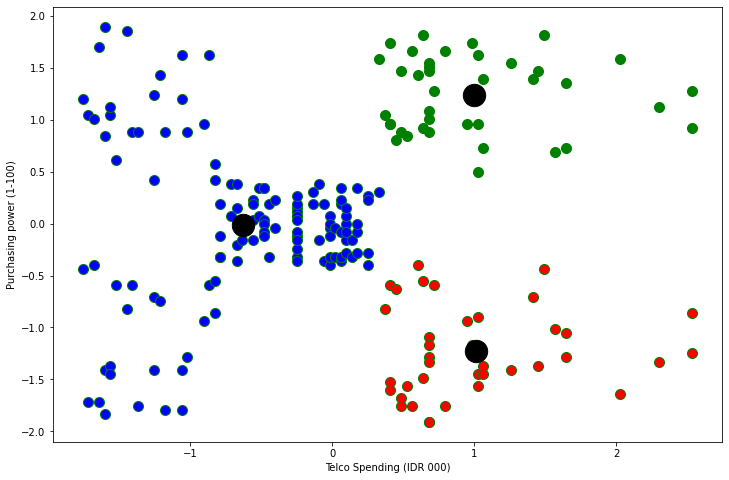

In [ ]:
sc = StandardScaler()
dfoutlier_std = sc.fit_transform(df.astype(float))

kmeans = KMeans(n_clusters=3, random_state=42,).fit(dfoutlier_std)
labels = kmeans.labels_

new_dfoutlier_std = pd.DataFrame(data = dfoutlier_std, columns = ['Telco Spending (IDR 000)', 'Purchasing power (1-100)'])
new_dfoutlier_std['label_kmeans'] = labels

fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(new_dfoutlier_std['Telco Spending (IDR 000)'][new_dfoutlier_std.label_kmeans == 0], new_dfoutlier_std['Purchasing power (1-100)'][new_dfoutlier_std.label_kmeans == 0], c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std['Telco Spending (IDR 000)'][new_dfoutlier_std.label_kmeans == 1], new_dfoutlier_std['Purchasing power (1-100)'][new_dfoutlier_std.label_kmeans == 1], c='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std['Telco Spending (IDR 000)'][new_dfoutlier_std.label_kmeans == 2], new_dfoutlier_std['Purchasing power (1-100)'][new_dfoutlier_std.label_kmeans == 2], c='green', s=100, edgecolor='green', linestyle='-')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
plt.xlabel('Telco Spending (IDR 000)')
plt.ylabel('Purchasing power (1-100)')
plt.show()

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


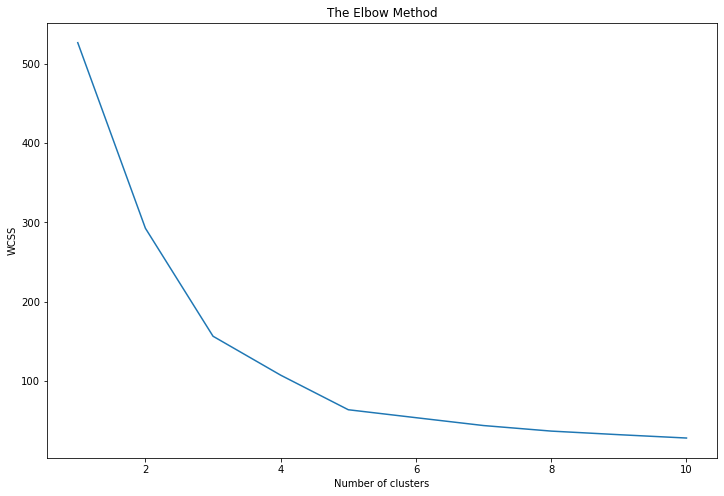

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,init='k-means++', random_state = 42)
    kmeans.fit(new_dfoutlier_std)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters=5, init='k-means++', random_state=42).fit(dfoutlier_std)

kmeans2.labels_

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 0, 2, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0])

# Menggunakan Jumlah Cluster dari Elbow Method

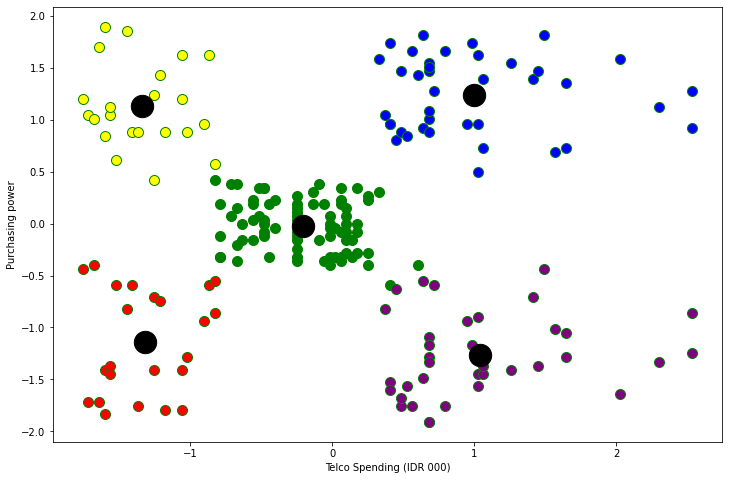

In [ ]:
labels2 = kmeans2.labels_

new_dfoutlier_std['label_kmeans2'] = labels2

fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(new_dfoutlier_std['Telco Spending (IDR 000)'][new_dfoutlier_std.label_kmeans2 == 0], new_dfoutlier_std['Purchasing power (1-100)'][new_dfoutlier_std.label_kmeans2 == 0], c='blue', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std['Telco Spending (IDR 000)'][new_dfoutlier_std.label_kmeans2 == 1], new_dfoutlier_std['Purchasing power (1-100)'][new_dfoutlier_std.label_kmeans2 == 1], c='red', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std['Telco Spending (IDR 000)'][new_dfoutlier_std.label_kmeans2 == 2], new_dfoutlier_std['Purchasing power (1-100)'][new_dfoutlier_std.label_kmeans2 == 2], c='green', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std['Telco Spending (IDR 000)'][new_dfoutlier_std.label_kmeans2 == 3], new_dfoutlier_std['Purchasing power (1-100)'][new_dfoutlier_std.label_kmeans2 == 3], c='purple', s=100, edgecolor='green', linestyle='-')
plt.scatter(new_dfoutlier_std['Telco Spending (IDR 000)'][new_dfoutlier_std.label_kmeans2 == 4], new_dfoutlier_std['Purchasing power (1-100)'][new_dfoutlier_std.label_kmeans2 == 4], c='yellow', s=100, edgecolor='green', linestyle='-')



centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500);
plt.xlabel('Telco Spending (IDR 000)')
plt.ylabel('Purchasing power')
plt.show()

# KESIMPULAN


Dari grafik diatas, dapat disimpulkan bahwa:

1. Segmen Biru= Memiliki nilai Telco Spending dan Purchase Power yang tinggi
2. Segmen Ungu= Memiliki nilai Telco Spending yang tinggi dan Purchase Power yang rendah
3. Segmen Hijau= Memiliki nilai Telco Spending dan Purchase Power yang tidak terlalu tinggi ataupun tidak terlalu rendah
4. Segmen Kuning= Memiliki nilai Telco Spending yang rendah dan Purchase Power yang tinggi
5. Segmen Merah= Memiliki nilai Telco Spending dan Purchase Power yang rendah

Pertanyaan Bisnis:

- Customer yang tergolong pada segmen berwarna biru adalah kondisi yang diinginkan, bagaimana agar customer segmen selain berwarna biru ikut meningkat?

Solusi Bisnis:
- Customer yang terbagi menjadi beberapa segmen memiliki karakteristik yang berbeda-beda.

    a. Segmen berwarna ungu adalah para customer yang menggunakan pelayanan telkomsel dengan harga mahal namun jarang melakukan
    pembelian pelayanan telkomsel
    
    b. Segmen berwarna hijau adalah para customer yang menggunakan pelayanan telkomsel dengan harga yang tidak terlalu mahal
    atau murah dan tidak terlalu sering melakukan pembelian pelayanan telkomsel
    
    c. Segmen berwarna kuning adalah para customer yang menggunakan pelayanan telkomsel dengan harga murah dan sering melakukan
    pembelian pelayanan telkomsel
    
    d. Segmen berwarna merah adalah para customer yang menggunakan pelayanan telkomsel dengan harga murah dan jarang melakukan
    pembelian pelayanan telkomsel
    
Untuk meningkatkan penggunaan pelayanan telkomsel agar seperti customer yang masuk dalam segmen biru, lebih baik kita memberikan sebuah survey online pada halaman utama aplikasi pelayanan telkomsel untuk memberikan sebuah promo pada pelayanan telkomsel khususnya pada pembelian kuota pada jenis produk yang sama atau merekomendasikan produk kuota dengan jenis yang baru kepada pengguna telkomsel sesuai dengan segmen yang telah dibagi. Hal ini dikarenakan customer sebagai masyarakat yang hidup di era teknologi bersifat konsumtif. Harapannya, dengan metode survey yang telah disebutkan, bisa meningkatkan pelayanan telkomsel dan experience customer.